In [3]:
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('/Users/balbi/Downloads/pyMorfologik-master'))
if module_path not in sys.path:
    sys.path.append(module_path)
from pymorfologik import Morfologik
from pymorfologik.parsing import ListParser

import numpy as np
from __future__ import print_function
import string

import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
result_df = pd.read_csv('mediaKrytyk-comments-analysis-dictParser-emotionsList.csv')
result_df = result_df.reset_index()
result_df.loc[result_df.detectedEmotion == 'neutral', 'detectedEmotion'] = "negative"
result_df['correct_guess'] = result_df['detectedEmotion'] == result_df['emotion']

In [47]:
def get_length(text):
    return len(text)

def get_length_bin(length):
    return round(length / 10)

def get_score(result):
    return 1 if result else 0

def prepereDataForPlot(result_df):
    result_df['score'] = map(get_score, result_df['correct_guess'])
    #create group with 10 elements
    result_df['text_length_bin'] = map(get_length_bin, result_df['words'])    
    return result_df

In [52]:
def createPlotTextLength(result_df):
    # data to plot
    n_groups = round(result_df['text_length_bin'].max())
    
    grouped = result_df.groupby('text_length_bin', as_index=False).mean()
    sum_elements = grouped.words
    means_words = grouped.words/sum_elements
    means_lemmatisation = grouped.wordsAfterLemmatisation/sum_elements
    means_emotions = grouped.wordsFound/sum_elements

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(len(grouped))
    bar_width = 0.35
    opacity = 0.5

    rects1 = plt.bar(index, means_words, bar_width,
                 alpha=opacity,
                 color='b')

    rects2 = plt.bar(index, means_lemmatisation, bar_width,
                 alpha=opacity,
                 color='g')
    
    rects2 = plt.bar(index, means_emotions, bar_width,
                 alpha=opacity,
                 color='c')

    plt.xlabel('Lenght of text')
    plt.ylabel('Percent')
    #plt.title('Scores by person')
    plt.xticks(index, (0, 10, 20, 30, 40, 50, 60, 70))
    plt.legend()

    plt.tight_layout()
    plt.show()

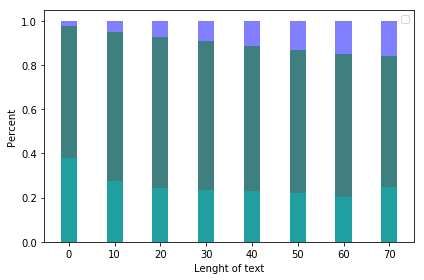

In [53]:
createPlotTextLength(result_df)

In [49]:
n_groups = round(result_df['text_length_bin'].max())
n_groups
np.arange(n_groups)
grouped = result_df.groupby('text_length_bin', as_index=False).mean()
np.arange(result_df['text_length_bin'].max())

array([0., 1., 2., 3., 4., 5., 6.])

In [54]:
grouped

,text_length_bin,index,rate,resultOfDetecting,words,wordsAfterLemmatisation,wordsFound,correct_guess,score
0,0.0,2790.588517,6.277033,0.108541,3.387560,3.306220,1.291866,0.684211,0.684211
1,1.0,2979.084092,6.336154,0.026266,9.850027,9.372255,2.693626,0.580611,0.580611
2,2.0,2991.682216,6.298980,0.013289,19.241497,17.801263,4.682216,0.603013,0.603013
3,3.0,3142.212389,6.209735,0.008471,28.932422,26.302494,6.795656,0.586484,0.586484
4,4.0,3089.700758,6.353409,0.002436,38.740530,34.270833,8.846591,0.547348,0.547348
5,5.0,3467.223881,6.232836,0.015994,48.111940,41.686567,10.597015,0.552239,0.552239
6,6.0,4175.903226,6.009677,-0.018389,58.322581,49.645161,11.741935,0.580645,0.580645
7,7.0,1456.666667,5.666667,-0.038048,67.666667,57.000000,16.666667,0.666667,0.666667


In [55]:
def createPlotRates(result_df):
    # data to plot
    result_df = result_df.round({'rate': 0})
    n_groups = result_df.rate.max()
    
    grouped = result_df.groupby('rate', as_index=False).mean()
    means_words = grouped.words/grouped.words
    means_lemmatisation = grouped.wordsAfterLemmatisation/grouped.words
    means_emotions = grouped.wordsFound/grouped.words

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(len(grouped))
    bar_width = 0.35
    opacity = 0.5

    rects1 = plt.bar(index, means_words, bar_width,
                 alpha=opacity,
                 color='b')

    rects2 = plt.bar(index, means_lemmatisation, bar_width,
                 alpha=opacity,
                 color='g')
    
    rects2 = plt.bar(index, means_emotions, bar_width,
                 alpha=opacity,
                 color='c')

    plt.xlabel('Rates')
    plt.ylabel('Percent')
    #plt.title('Scores by person')
    plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
    plt.legend()

    plt.tight_layout()
    plt.show()

In [56]:
def createPlotByScore(data):
    grouped = data.groupby('words', as_index=False)['score'].mean()
    fig, ax = plt.subplots()
    x = grouped.words
    y = grouped.score
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)
    
    plt.xlabel('Lenght of text')
    plt.ylabel('Efficacy')
    
    fig.show()

In [57]:
#zaleznosc oceny od wykrytej emocji
def createPlotByRate(data):
    data = data.round({'rate': 0})   
    grouped = data.groupby('rate', as_index=False)['score'].mean()
    fig, ax = plt.subplots()
    x = grouped.rate
    y = grouped.score
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)
    
    plt.xlabel('Rate')
    plt.ylabel('Efficacy')

    fig.show()

In [58]:
def createPlotByWordsFound(result):
    grouped = result.groupby('wordsFound', as_index=False)['score'].mean()
    fig, ax = plt.subplots()
    x = grouped.wordsFound
    y = grouped.score
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)

    plt.xlabel('Found words in Slowosiec')
    plt.ylabel('Efficacy')
    
    fig.show()

In [59]:
def changeRangeOfComments(maximumNegativeRate, mimimumPositiveRate, comments):
    comments = comments[(comments.rate <= maximumNegativeRate) | (comments.rate >= mimimumPositiveRate)]
    comments = comments.reset_index()
    return comments

In [12]:
def getResults(result_df):
    return result_df.groupby('correct_guess').size()

/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


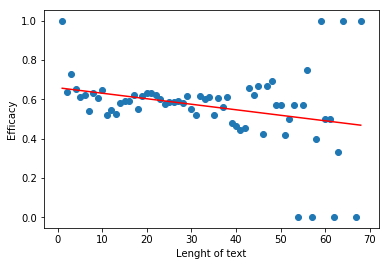

In [61]:
createPlotByScore(result_df)

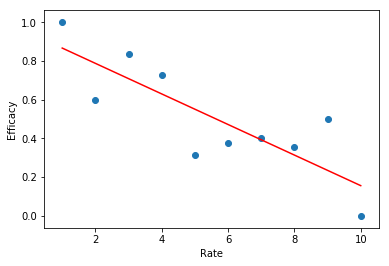

In [186]:
createPlotByRate(result_df)

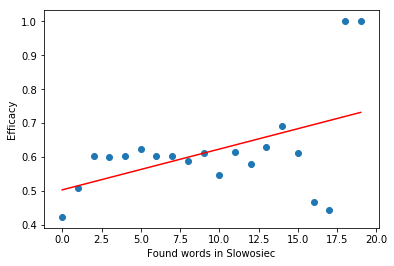

In [62]:
createPlotByWordsFound(result_df)

In [188]:
getResults(result_df)

correct_guess
False    173
True     146
dtype: int64

In [48]:
result_df = prepereDataForPlot(result_df)

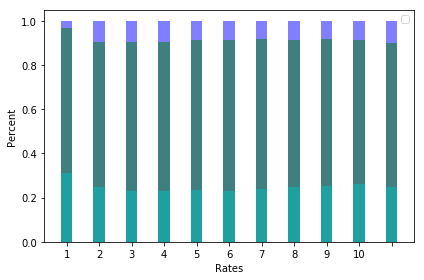

In [60]:
createPlotRates(result_df)

In [63]:
def devide(number):
    return number/2

def moreThenHalf(result_df):
    result_df['half_wordsAfterLemmatisation'] = map(devide, result_df['wordsAfterLemmatisation'])
    result_df['moreThenHalf'] = 0
    result_df['moreThenHalf'] = np.where(((result_df['wordsFound'] >= result_df['half_wordsAfterLemmatisation']) & (result_df['half_wordsAfterLemmatisation'] > 0) & (result_df['wordsFound'] > 0)), 1 , 0)
    return result_df

In [64]:
tym = moreThenHalf(result_df)
tym.groupby('moreThenHalf').size()
review_less = tym.loc[tym['moreThenHalf'] == 1]
review_less['correct_guess'] = review_less['detectedEmotion'] == review_less['emotion']
review_less.groupby('correct_guess').size()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


correct_guess
False    100
True     300
dtype: int64

In [65]:
result = result_df.round({'rate': 0})
grouped = result.groupby('rate', as_index=False).mean()

In [66]:
grouped

,rate,index,resultOfDetecting,words,wordsAfterLemmatisation,wordsFound,correct_guess,score,text_length_bin,half_wordsAfterLemmatisation,moreThenHalf
0,0.0,3165.333333,-0.177073,10.166667,9.833333,3.166667,0.833333,0.833333,1.000000,4.916667,0.000000
1,1.0,3879.979592,-0.092859,16.142857,14.632653,3.979592,0.775510,0.775510,1.714286,7.316327,0.183673
2,2.0,3065.756944,-0.117645,18.451389,16.673611,4.208333,0.812500,0.812500,1.930556,8.336806,0.069444
3,3.0,3004.479784,-0.079762,20.102426,18.156334,4.628032,0.778976,0.778976,2.064690,9.078167,0.059299
4,4.0,3009.232143,-0.038359,20.188776,18.446429,4.698980,0.660714,0.660714,2.081633,9.223214,0.053571
5,5.0,2990.137705,-0.016827,21.045902,19.185792,4.794536,0.604372,0.604372,2.170492,9.592896,0.045902
6,6.0,3070.361963,0.015252,21.540900,19.776074,5.143149,0.482618,0.482618,2.212679,9.888037,0.044990
7,7.0,2979.779178,0.050589,20.578249,18.798408,5.065650,0.564324,0.564324,2.107427,9.399204,0.070955
8,8.0,3062.071203,0.058161,19.580696,17.958861,4.944620,0.572785,0.572785,2.014241,8.979430,0.087025
9,9.0,3157.515244,0.068980,19.829268,18.140244,5.152439,0.621951,0.621951,2.027439,9.070122,0.079268


In [190]:
round(result_df['text_length_bin'].max())

11.0

In [38]:
result_df.groupby('correct_guess').size()

correct_guess
False    2493
True     3580
dtype: int64